In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('../Dataset/acs_data2_cleaned.csv')

In [3]:
df.columns

Index(['cycle_number', 'heat_rate_1_c_min', 'ramp_1_duration_min',
       'temperature_dwell_1_min', 'ramp_2_duration_min',
       'vacuum_pressure_patm_pa', 'vacuum_start_time_min',
       'vacuum_duration_min', 'autoclave_pressure_patm_pa',
       'autoclave_start_time_min', 'autoclave_duration_min',
       'ad_porosity_percent', 'pr_porosity_percent', 'eff_porosity_percent',
       'max_fiber_volume_fraction_percent', 'cure_cycle_total_time_min',
       'ad_volume', 'pr_volume'],
      dtype='object')

Variables Highly Correlated with Each Other:
                    Variable 1                         Variable 2  Correlation
5          ramp_2_duration_min          cure_cycle_total_time_min     0.992737
10         ad_porosity_percent               eff_porosity_percent     0.990841
8   autoclave_pressure_patm_pa  max_fiber_volume_fraction_percent     0.919631
9       autoclave_duration_min          cure_cycle_total_time_min     0.882688
7          vacuum_duration_min          cure_cycle_total_time_min     0.882530
3          ramp_2_duration_min                vacuum_duration_min     0.876294
4          ramp_2_duration_min             autoclave_duration_min     0.876261
6          vacuum_duration_min             autoclave_duration_min     0.779161
1                 cycle_number            temperature_dwell_1_min    -0.750642
0                 cycle_number                ramp_1_duration_min    -0.869761
2            heat_rate_1_c_min                ramp_1_duration_min    -0.885331


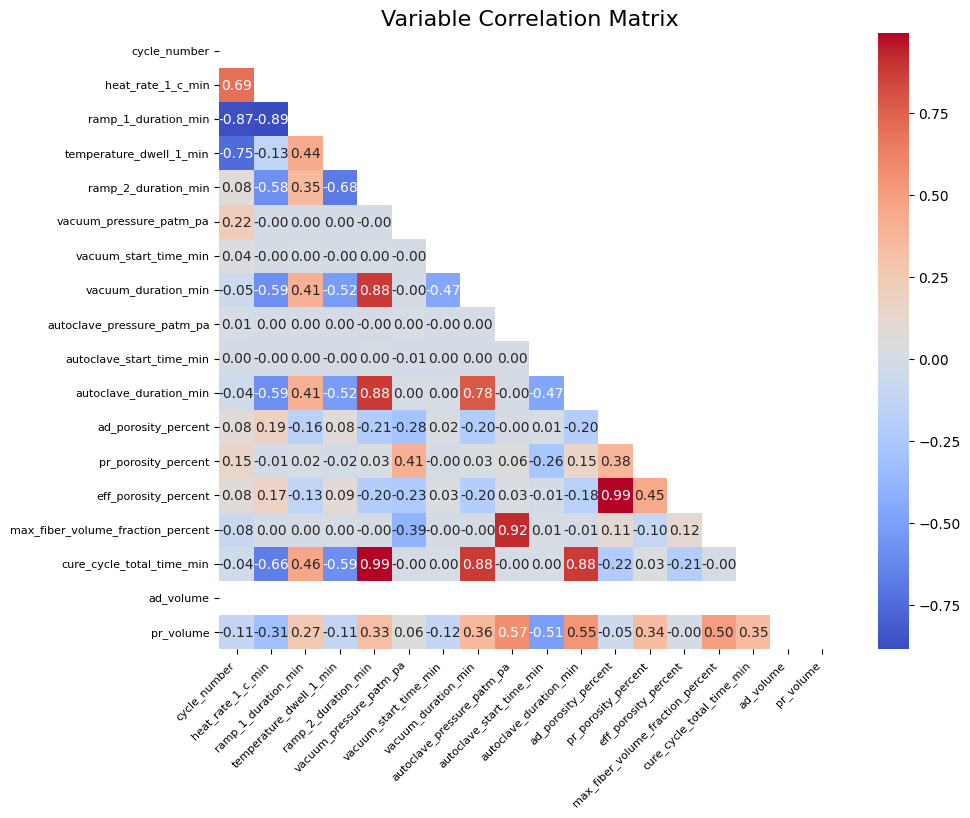

In [4]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Use seaborn for correlation heatmap
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)

# Set plot metadata
ax.set_title("Variable Correlation Matrix", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=8)

# Find highly correlated variables based on the thresholds
highly_correlated_vars = []
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            highly_correlated_vars.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))


table = pd.DataFrame(highly_correlated_vars, columns=["Variable 1", "Variable 2", "Correlation"])
table.sort_values("Correlation", ascending=False, inplace=True)

print("Variables Highly Correlated with Each Other:")
print(table)


plt.show()


Variables Highly Correlated with Each Other (Spearman):
                    Variable 1                         Variable 2  Correlation
7          ramp_2_duration_min          cure_cycle_total_time_min     1.000000
11         ad_porosity_percent               eff_porosity_percent     0.971680
9   autoclave_pressure_patm_pa  max_fiber_volume_fraction_percent     0.940483
5          ramp_2_duration_min                vacuum_duration_min     0.807710
8          vacuum_duration_min          cure_cycle_total_time_min     0.807710
6          ramp_2_duration_min             autoclave_duration_min     0.806646
10      autoclave_duration_min          cure_cycle_total_time_min     0.806646
12         pr_porosity_percent               eff_porosity_percent     0.706165
1                 cycle_number            temperature_dwell_1_min    -0.751967
0                 cycle_number                ramp_1_duration_min    -0.771292
3      temperature_dwell_1_min                ramp_2_duration_min    -0.776

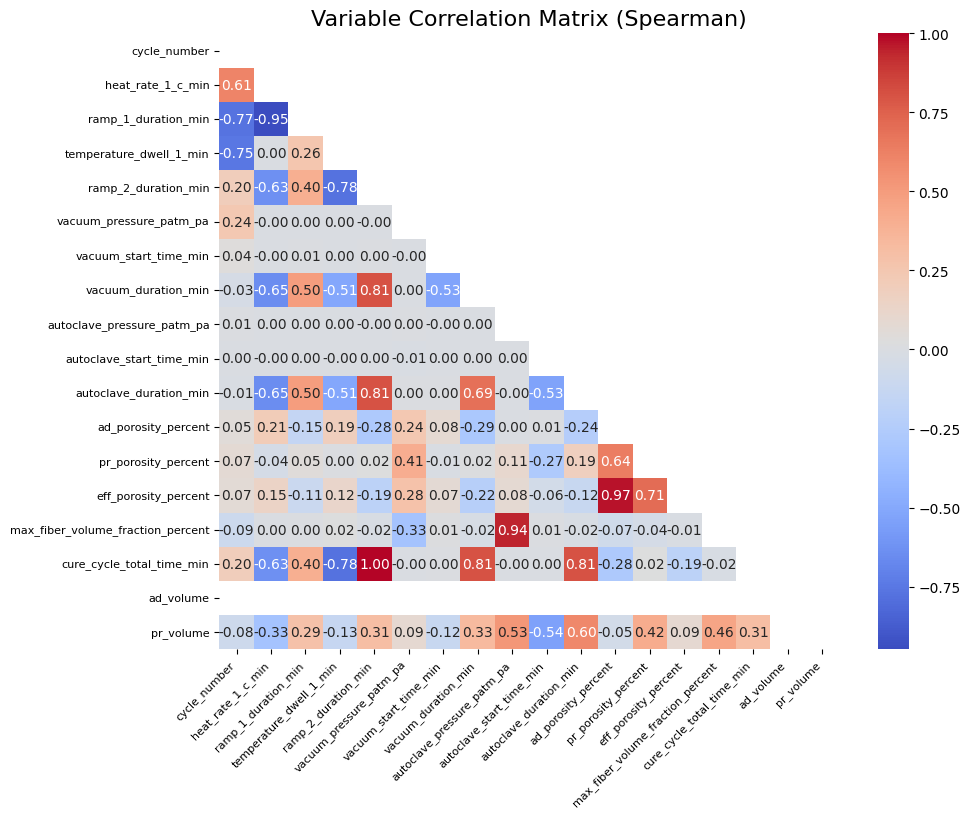

In [5]:
# Calculate the Spearman correlation matrix
corr_matrix = df.corr(method='spearman')

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the correlation heatmap using seaborn
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)

# Customize the plot
ax.set_title("Variable Correlation Matrix (Spearman)", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right", fontsize=8)

# Find highly correlated variables based on the thresholds
highly_correlated_vars = []
threshold = 0.7

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            highly_correlated_vars.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Create a beautiful table to display highly correlated variables
table = pd.DataFrame(highly_correlated_vars, columns=["Variable 1", "Variable 2", "Correlation"])
table.sort_values("Correlation", ascending=False, inplace=True)

print("Variables Highly Correlated with Each Other (Spearman):")
print(table)

plt.show()


In [ ]:
# Create a pairplot amongst all the variables
sns.pairplot(df)

In [ ]:
X = df.drop(['ad_porosity_percent', 'pr_porosity_percent', 'eff_porosity_percent', 'max_fiber_volume_fraction_percent', 'cure_cycle_total_time_min','ad_volume', 'pr_volume'], axis=1)
y = df[['ad_porosity_percent', 'pr_porosity_percent', 'eff_porosity_percent', 'max_fiber_volume_fraction_percent', 'cure_cycle_total_time_min']]

# Assuming you want to reduce to 2 components for easy visualization
pca = PCA(n_components=2)

# Assuming 'X' is your DataFrame with only independent variables
X_pca = pca.fit_transform(X)

# This will create a scatter plot of your data in the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [ ]:
temp_df=df[['cycle_number', 'heat_rate_1_c_min', 'ramp_1_duration_min',
       'temperature_dwell_1_min', 'ramp_2_duration_min',
       'vacuum_pressure_patm_pa', 'vacuum_start_time_min',
       'vacuum_duration_min', 'autoclave_pressure_patm_pa',
       'autoclave_start_time_min', 'autoclave_duration_min']]

updated_minmax=temp_df.describe().transpose()[['min','max']]

# String manipulation for display purpose
array_string = "np.array([" + ", ".join([
    "np.random.uniform({}, {})".format(row['min'], row['max'])
    for _, row in updated_minmax.iterrows()
]) + "])"

print(array_string)

In [ ]:
temp_df=df[['ad_porosity_percent', 'pr_porosity_percent', 'eff_porosity_percent',
       'max_fiber_volume_fraction_percent', 'cure_cycle_total_time_min']]

# Univariate analysis of dependent variables
temp_df.describe().transpose()[['min','max','mean','50%']]

In [ ]:
temp_df=df[['cycle_number', 'heat_rate_1_c_min', 'ramp_1_duration_min',
       'temperature_dwell_1_min', 'ramp_2_duration_min',
       'vacuum_pressure_patm_pa', 'vacuum_start_time_min',
       'vacuum_duration_min', 'autoclave_pressure_patm_pa',
       'autoclave_start_time_min', 'autoclave_duration_min']]

# Univariate analysis of independent variables
df.describe().transpose()[['count','min','max','mean','50%']]